In [7]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = './Audio/Original_Password.wav'
sampling_rate, audio = wavfile.read(file_path)

In [4]:
Fpass = 2000 # Passband frequency in Hz
Fstop = 3000 # Stopband frequency in Hz
Fs = 8000 # Sampling frequency in Hz

In [5]:
taps = 101 # Filter length
nyquist = 0.5 * Fs
bands = [0, Fpass, Fstop, nyquist]
desired = [1, 0]
h = signal.remez(taps, bands, desired, fs=Fs)

In [6]:
filtered_audio = signal.lfilter(h, 1, audio)

In [8]:
time = np.arange(len(audio)) / sampling_rate

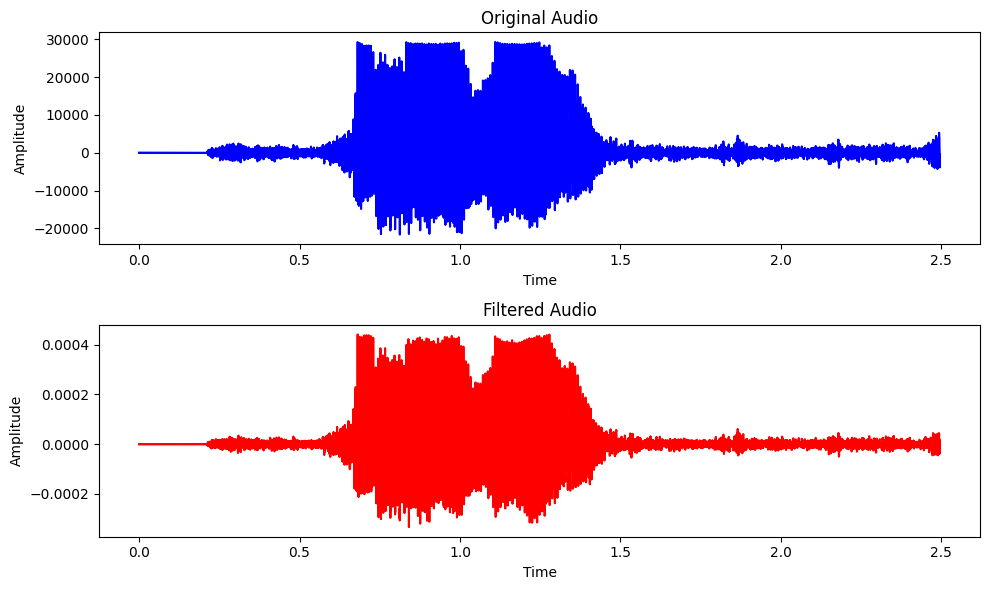

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title('Original Audio')
plt.plot(time, audio, color='b')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.title('Filtered Audio')
plt.plot(time, filtered_audio, color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
# Save the filtered audio to a file
output_file = './Audio/Output.wav'
wavfile.write(output_file, sampling_rate, np.asarray(filtered_audio, 
dtype=np.int16))